**Author:** Boris Kundu

**Dataset:** 
Spam SMS Data

**Problem Statement:**
Classify SMS as spam or not

In [52]:
#Import packages
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report 
%matplotlib inline

In [53]:
#Read data
msgs = [line.rstrip() for line in open('SMSSpamCollection')]

In [54]:
#Check count of SMSs
len(msgs)

5574

In [55]:
#Check sample
msgs[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [56]:
#Check samples
for num,msg in enumerate(msgs[:5]):
    print(f'Message Num:{num}\nMessage:{msg}\n')

Message Num:0
Message:ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

Message Num:1
Message:ham	Ok lar... Joking wif u oni...

Message Num:2
Message:spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

Message Num:3
Message:ham	U dun say so early hor... U c already then say...

Message Num:4
Message:ham	Nah I don't think he goes to usf, he lives around here though



In [57]:
#Read and create data frame 
msgs = pd.read_csv('SMSSpamCollection',sep='\t',names=['label','message'])

In [58]:
#Check head
msgs.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [59]:
#Check stats
msgs.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [60]:
#Group messages by label
msgs.groupby('label').describe().T

label                              ham  \
message count                     4825   
        unique                    4516   
        top     Sorry, I'll call later   
        freq                        30   

label                                                        spam  
message count                                                 747  
        unique                                                653  
        top     Please call our customer service representativ...  
        freq                                                    4

In [61]:
#Add SMS length as feature
msgs['length'] = msgs['message'].apply(len)

In [62]:
#Check head
msgs.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


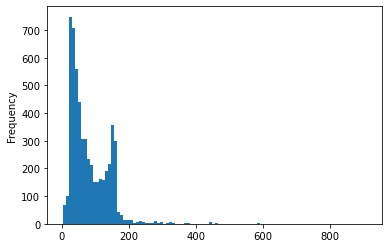

In [63]:
#Plot histogram of SMS length
msgs['length'].plot.hist(bins=100)
plt.show()

In [64]:
#Check stats
msgs['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [65]:
#Check longest message
msgs[msgs['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

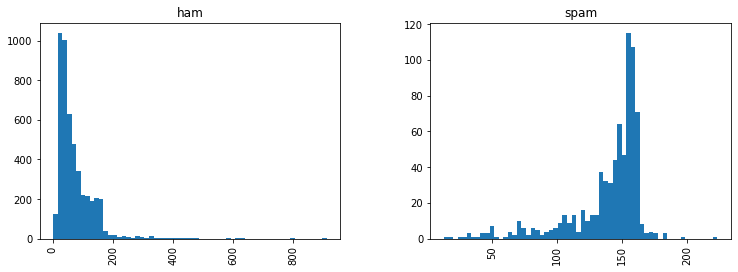

In [66]:
#Plot length of messages by label 
msgs.hist(column='length',by='label',figsize=(12,4),bins=60)

In [67]:
my_msg = 'Simple message!!. Notice: it has punctuations.'
nopuncmsg = [c for c in my_msg if c not in string.punctuation]
nopuncmsg

['S',
 'i',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n',
 's']

In [68]:
nopuncmsg = ''.join(nopuncmsg)
nopuncmsg

'Simple message Notice it has punctuations'

In [69]:
stopwords.words('english')[:5] 

['i', 'me', 'my', 'myself', 'we']

In [70]:
nopuncmsg.split()

['Simple', 'message', 'Notice', 'it', 'has', 'punctuations']

In [71]:
clean_msg = [word for word in nopuncmsg.split() if word.lower() not in stopwords.words('english')]
clean_msg

['Simple', 'message', 'Notice', 'punctuations']

In [72]:
#Function to pre-process message
def pre_process(my_msg):
    """
    1. Remove punctuations
    2. Remove stopwords
    3. return list of clean text word
    """
    nopuncmsg = [ch for ch in my_msg if ch not in string.punctuation]
    nopuncmsg = ''.join(nopuncmsg)
    return [word for word in nopuncmsg.split() if word.lower() not in stopwords.words('english')]

In [73]:
#Get tokens
msgs['tokens'] = msgs['message'].apply(pre_process)

In [74]:
#We can do stemming as well
#Get bag of words model
bow_transformer = CountVectorizer(analyzer=pre_process).fit(msgs['message'])

In [100]:
print(f'Vocabulary Size:{len(bow_transformer.vocabulary_)}')

Vocabulary Size:11425


In [76]:
#Sample message
mess = msgs['message'][3]
mess

'U dun say so early hor... U c already then say...'

In [77]:
#Sample transformation
bow = bow_transformer.transform([mess])
print(f'Trsnformed Sample:{bow}') # 7 unique tokens aka words. 'U' and 'say' each have count '2'
print(f'Trsnformed Sample Shape:{bow.shape}') # 1 row with 7 non-zero values. 

Trsnformed Sample:  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
Trsnformed Sample Shape:(1, 11425)


In [78]:
#Check feature (words) at positions
print(bow_transformer.get_feature_names()[4068])
print(bow_transformer.get_feature_names()[9554])

U
say


In [79]:
#Corpus transformation
msgs_bow = bow_transformer.transform(msgs['message'])

In [80]:
print('Corpus Shape:',msgs_bow.shape)

Corpus Shape: (5572, 11425)


In [81]:
msgs_bow.shape[0]

5572

In [82]:
msgs_bow.shape[1]

11425

In [83]:
msgs_bow.nnz #Non zero occurences

50548

In [84]:
#Sparisty
sparsity = (100.0 * msgs_bow.nnz / (msgs_bow.shape[0] * msgs_bow.shape[1]))
print(f'Sparsity:{sparsity}')

Sparsity:0.07940295412668218


In [85]:
#Create and fit tfidf transformer
tfidf_transformer = TfidfTransformer().fit(msgs_bow)

In [86]:
#Transform sample sms using tfidf
tfidf_bow = tfidf_transformer.transform(bow)

In [87]:
print(tfidf_bow)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [88]:
#Check inverse-document-fequencey of the word 'university'
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [89]:
#Transform corpus using tfidf
msgs_tfidf = tfidf_transformer.transform(msgs_bow)

In [90]:
#Create and fi MultinomialNB on entire dataset to check
spam_detect_model = MultinomialNB().fit(msgs_tfidf,msgs['label'])

In [91]:
#Predict label of sample message
spam_detect_model.predict(bow)

array(['ham'], dtype='<U4')

In [92]:
#Check true label of sample message
msgs['label'][3]

'ham'

In [93]:
#Get predictions for entire courpus
all_pred = spam_detect_model.predict(msgs_tfidf)

In [94]:
#Check preidictions
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [95]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(msgs['message'], msgs['label'], test_size = 0.3, random_state=101)

In [96]:
#Create pipeline 
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=pre_process)),
    ('tfdif',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [97]:
#Fit
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function pre_process at 0x0000028AFC607280>)),
                ('tfdif', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [98]:
#Predict on Test
predictions = pipeline.predict(X_test)

In [101]:
#Display classification report
print(f'Classification Report:\n{classification_report(y_test,predictions)}')

Classification Report:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1475
        spam       1.00      0.65      0.79       197

    accuracy                           0.96      1672
   macro avg       0.98      0.83      0.88      1672
weighted avg       0.96      0.96      0.96      1672

